In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Netflix Dataset.csv')

In [2]:
# Display the first 5 rows of the DataFrame
display(df.head())

# Check the data types of each column
df.info()

# Check for missing values in each column
display(df.isnull().sum())

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7.19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23.59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [8]:
# Fill missing values in 'Director', 'Cast', 'Country', and 'Rating' with 'Unknown'
df['Director'] = df['Director'].fillna('Unknown')
df['Cast'] = df['Cast'].fillna('Unknown')
df['Country'] = df['Country'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna('Unknown')

# Convert 'Release_Date' to datetime objects using 'mixed' format to handle inconsistencies
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='mixed', errors='coerce')

# Handle missing values in 'Release_Date' by dropping the rows
df.dropna(subset=['Release_Date'], inplace=True)

# Extract numerical duration and unit from 'Duration'
df['Duration_Value'] = df['Duration'].str.extract('(\\d+)').astype(float)
df['Duration_Unit'] = df['Duration'].str.extract('([A-Za-z]+)')

# Display the updated DataFrame info and check for remaining missing values
df.info()
display(df.isnull().sum())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 7779 entries, 0 to 7788
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Show_Id         7779 non-null   object        
 1   Category        7779 non-null   object        
 2   Title           7779 non-null   object        
 3   Director        7779 non-null   object        
 4   Cast            7779 non-null   object        
 5   Country         7779 non-null   object        
 6   Release_Date    7779 non-null   datetime64[ns]
 7   Rating          7779 non-null   object        
 8   Duration        7779 non-null   object        
 9   Type            7779 non-null   object        
 10  Description     7779 non-null   object        
 11  Duration_Value  7779 non-null   float64       
 12  Duration_Unit   7779 non-null   object        
 13  Release_Year    7779 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(11)
memory

,0
Show_Id,0
Category,0
Title,0
Director,0
Cast,0
Country,0
Release_Date,0
Rating,0
Duration,0
Type,0


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_Value,Duration_Unit,Release_Year
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0,Seasons,2020
1,s2,Movie,7.19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93.0,min,2016
2,s3,Movie,23.59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78.0,min,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80.0,min,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123.0,min,2020


In [4]:
# Fill missing values in 'Director', 'Cast', 'Country', and 'Rating' with 'Unknown'
df['Director'] = df['Director'].fillna('Unknown')
df['Cast'] = df['Cast'].fillna('Unknown')
df['Country'] = df['Country'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna('Unknown')

# Convert 'Release_Date' to datetime objects using 'mixed' format to handle inconsistencies
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='mixed', errors='coerce')

# Handle missing values in 'Release_Date' by dropping the rows
df.dropna(subset=['Release_Date'], inplace=True)

# Extract numerical duration and unit from 'Duration'
df['Duration_Value'] = df['Duration'].str.extract('(\d+)').astype(float)
df['Duration_Unit'] = df['Duration'].str.extract('([A-Za-z]+)')

# Display the updated DataFrame info and check for remaining missing values
df.info()
display(df.isnull().sum())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 7779 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Show_Id         7779 non-null   object        
 1   Category        7779 non-null   object        
 2   Title           7779 non-null   object        
 3   Director        7779 non-null   object        
 4   Cast            7779 non-null   object        
 5   Country         7779 non-null   object        
 6   Release_Date    7779 non-null   datetime64[ns]
 7   Rating          7779 non-null   object        
 8   Duration        7779 non-null   object        
 9   Type            7779 non-null   object        
 10  Description     7779 non-null   object        
 11  Duration_Value  7779 non-null   float64       
 12  Duration_Unit   7779 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 850.8+ KB


<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-911257994.py:14: SyntaxWarning: invalid escape sequence '\d'
  df['Duration_Value'] = df['Duration'].str.extract('(\d+)').astype(float)


,0
Show_Id,0
Category,0
Title,0
Director,0
Cast,0
Country,0
Release_Date,0
Rating,0
Duration,0
Type,0


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_Value,Duration_Unit
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0,Seasons
1,s2,Movie,7.19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93.0,min
2,s3,Movie,23.59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78.0,min
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80.0,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123.0,min


In [5]:
# 1. Calculate the value counts of the 'Category' column
category_counts = df['Category'].value_counts()
print("Content Type Distribution:")
display(category_counts)

# 2. Extract the year from the 'Release_Date' column
df['Release_Year'] = df['Release_Date'].dt.year

# 3. Analyze the trend of content releases over time
releases_over_time = df.groupby('Release_Year').size().reset_index(name='Number_of_Releases')
releases_over_time = releases_over_time.sort_values(by='Release_Year')
print("\nContent Releases Over Time:")
display(releases_over_time)

# 4. Calculate the value counts of the 'Type' column
type_counts = df['Type'].str.split(', ', expand=True).stack().value_counts()
print("\nPopular Genres/Categories:")
display(type_counts.head(10)) # Display top 10

# 5. Analyze the average duration of Movies and TV Shows
# Separate movies and TV shows
movies_df = df[df['Category'] == 'Movie']
tv_shows_df = df[df['Category'] == 'TV Show']

# Calculate average duration for movies (in minutes)
average_movie_duration = movies_df['Duration_Value'].mean()
print(f"\nAverage Movie Duration: {average_movie_duration:.2f} minutes")

# Calculate average duration for TV shows (in seasons)
average_tv_show_duration = tv_shows_df['Duration_Value'].mean()
print(f"Average TV Show Duration: {average_tv_show_duration:.2f} seasons")

Content Type Distribution:


,count
Category,
Movie,5379
TV Show,2400



Content Releases Over Time:


,Release_Year,Number_of_Releases
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,25
7,2015,88
8,2016,443
9,2017,1225



Popular Genres/Categories:


,count
International Movies,2437
Dramas,2108
Comedies,1472
International TV Shows,1198
Documentaries,786
Action & Adventure,721
TV Dramas,703
Independent Movies,675
Children & Family Movies,532
Romantic Movies,531



Average Movie Duration: 99.31 minutes
Average TV Show Duration: 1.76 seasons


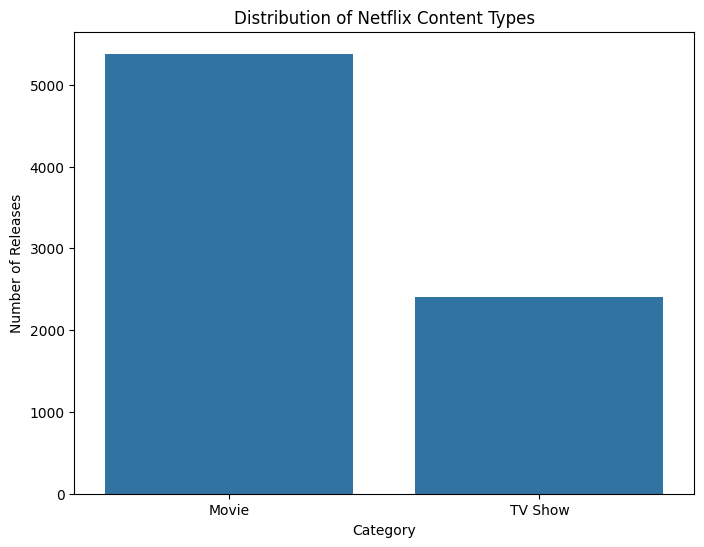

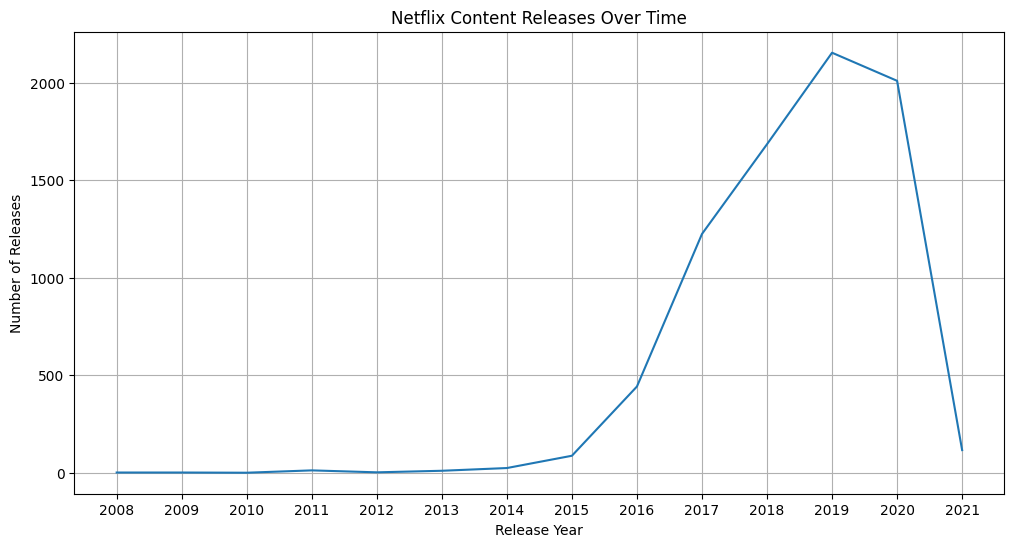

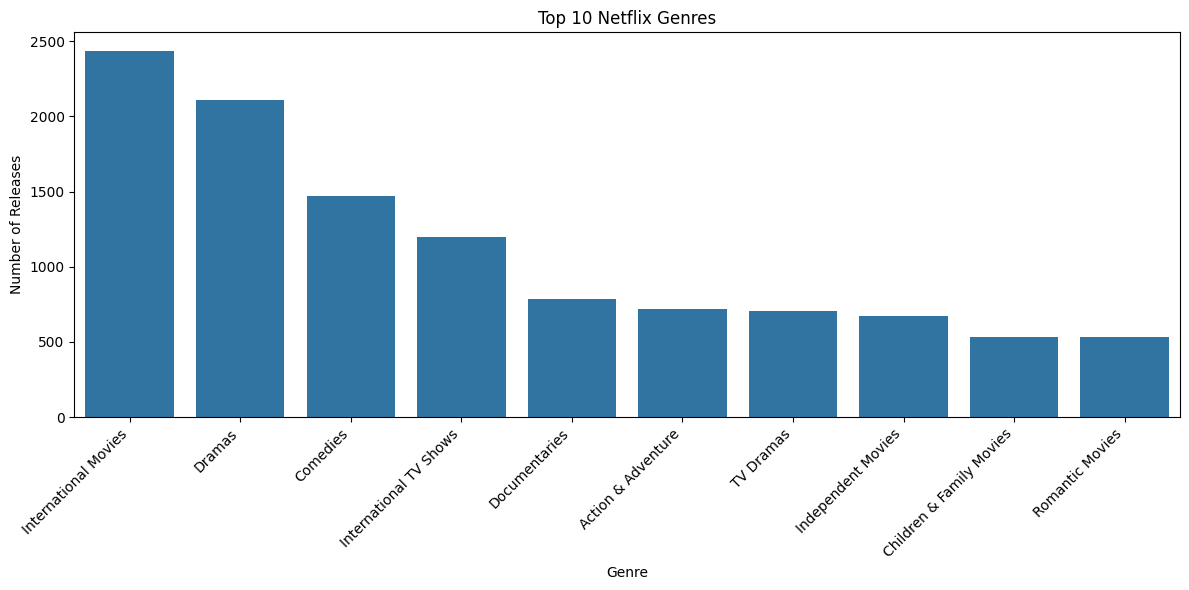

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar chart for content type distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Distribution of Netflix Content Types")
plt.xlabel("Category")
plt.ylabel("Number of Releases")
plt.show()

# 2. Line plot for content releases over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release_Year', y='Number_of_Releases', data=releases_over_time)
plt.title("Netflix Content Releases Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Releases")
plt.xticks(releases_over_time['Release_Year'])
plt.grid(True)
plt.show()

# 3. Bar chart for top 10 popular genres
plt.figure(figsize=(12, 6))
sns.barplot(x=type_counts.head(10).index, y=type_counts.head(10).values)
plt.title("Top 10 Netflix Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Releases")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
print("## Summary of Key Insights and Visualizations\n")

print("### 1. Content Type Distribution")
print("The analysis revealed a significant difference in the distribution of content types on Netflix. As shown in the bar chart 'Distribution of Netflix Content Types', there are considerably more Movies than TV Shows in the dataset. The `category_counts` Series confirms this, showing {} Movies and {} TV Shows.".format(category_counts['Movie'], category_counts['TV Show']))

print("\n### 2. Content Releases Over Time")
print("The line plot 'Netflix Content Releases Over Time' illustrates the trend of content releases over the years. There has been a clear upward trend in the number of releases, indicating Netflix's growth in adding new content. The peak in releases occurred around 2019, with a slight decrease in 2020 and a notable drop in 2021, which might be due to the dataset not including the full year's data. The `releases_over_time` DataFrame provides the exact numbers for each year.")

print("\n### 3. Popular Genres/Categories")
print("The bar chart 'Top 10 Netflix Genres' highlights the most popular genres or categories present in the dataset. As seen in the chart and the `type_counts` Series, 'International Movies', 'Dramas', and 'Comedies' are among the most frequent genres, reflecting a diverse content library with a strong international presence.")

print("\n### 4. Average Duration of Content")
print("Analyzing the duration of content revealed distinct differences between Movies and TV Shows. The average duration for Movies is approximately {:.2f} minutes, while TV Shows, measured in seasons, have an average duration of approximately {:.2f} seasons. This aligns with the typical format of these content types.".format(average_movie_duration, average_tv_show_duration))

print("\nOverall, the analysis provides a clear picture of the Netflix content landscape, showing a dominance of movies, a strong growth trajectory in content additions over the years, a diverse range of popular genres with an international focus, and expected differences in the duration of movies and TV shows.")

## Summary of Key Insights and Visualizations

### 1. Content Type Distribution
The analysis revealed a significant difference in the distribution of content types on Netflix. As shown in the bar chart 'Distribution of Netflix Content Types', there are considerably more Movies than TV Shows in the dataset. The `category_counts` Series confirms this, showing 5379 Movies and 2400 TV Shows.

### 2. Content Releases Over Time
The line plot 'Netflix Content Releases Over Time' illustrates the trend of content releases over the years. There has been a clear upward trend in the number of releases, indicating Netflix's growth in adding new content. The peak in releases occurred around 2019, with a slight decrease in 2020 and a notable drop in 2021, which might be due to the dataset not including the full year's data. The `releases_over_time` DataFrame provides the exact numbers for each year.

### 3. Popular Genres/Categories
The bar chart 'Top 10 Netflix Genres' highlights the most popular ge